# Construccion de modelos de aprendizaje automatico

## Modelo de Regresion Lineal
Tanto las variables independientes como la variable dependiente son de naturaleza cuantitativa

In [1]:
# MOdulos y datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creacion de modelos usando scikit-learn
# 1. Particionar nuestros datos en : subconjunto de entrenamiento y un subconjunto de testeo
from sklearn.model_selection import train_test_split
# 2. Clase a modelar : LinearRegression (Para modelar una regresion lineal)
from sklearn.linear_model import LinearRegression
# 3. Submodulo metrics : Varios indicadores de calidad
from sklearn import metrics

# Dataset
df = pd.read_csv("https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/refs/heads/master/HousePrices.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# Eliminemos la columna Id : Utilizaremos el metodo drop de un objeto de tipo DataFrame
# type(df)
# dir(df)
# help(df.shape)
# help(df.drop)

# Dos opciones : PRimera opcion es actualizar la variable u objeto df
# df = df.drop("Id", axis = 1)

# Segunda opcion : es reeemplazar el objeto df especificando el argumento inplace (del metodo drop)
# con valor True
df.drop("Id", axis = 1, inplace = True)

In [9]:
# Atributo/propiedad : columns , devuelve un objeto con los nombres de las columnas
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [14]:
# Datos faltantes  : Uso de los metodos isnull (isna) y sum
# df.isnull().sum()

# Una mejor opcion es ordenar este resultado en funcion del numero de
# valores faltantes por columna
df_nulos = df.isnull().sum().sort_values(ascending=False)
df_nulos

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
...,...
Heating,0
HeatingQC,0
MSZoning,0
1stFlrSF,0


In [15]:
# Tipo de dato
type(df_nulos)

pandas.core.series.Series

In [16]:
# Obtengamos las columnas que poseen valores faltantes
df_nulos.loc[df_nulos != 0 ]

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81


In [18]:
# Mostremos el porcentaje de valores faltantes para cada columna
df_nulos.loc[df_nulos != 0 ]/df.shape[0]*100

,0
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
MasVnrType,59.726027
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageCond,5.547945
GarageType,5.547945


In [20]:
# Deseo obtener las columnas con informacion numerica/cuantitativa
# Una lista en blanco/vacia para almacenar las columnas con informacion numerica
lista_var_numericas = list()

# Usando una estructura repetitiva, barreremos todos los nombres de columnas para verificar
# la naturaleza numerica de estas (int64 , float64)
for col in df.columns:
  if (df[col].dtype == "int64") or (df[col].dtype == "float64"):
    lista_var_numericas.append(col)

# Mostremos solo estas columnas en df
df[lista_var_numericas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [21]:
# De igual manera podemos obtener las columnas que proveen
# informacion no numerica (object)
lista_var_no_num = []

for col in df.columns:
  if df[col].dtype == "object":
    lista_var_no_num.append(col)

# Filtramos las columnas con informacion no numericas del objeto df
df[lista_var_no_num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     588 non-null    object
 18  ExterQual      1460 non-null

In [22]:
# En funcion de las observaciones y calculos realizados hasta esta celda, concluimos
# que el objeto a utilizar para construir un primer modelo de naturaleza regresional
# es df[lista_var_numericas]

# Definamos quienes son las variables independientes y quien es la variable dependiente
y = df[lista_var_numericas].SalePrice
X = df[lista_var_numericas].drop("SalePrice", axis = 1)

In [26]:
# Analicemos los valores faltantes de la variable dependiente
y.isnull().sum()

0

In [28]:
# Analicemos los valores faltantes de las variables independientes
X.isnull().sum().sort_values(ascending = False)

,0
LotFrontage,259
GarageYrBlt,81
MasVnrArea,8
WoodDeckSF,0
BedroomAbvGr,0
KitchenAbvGr,0
TotRmsAbvGrd,0
Fireplaces,0
GarageCars,0
GarageArea,0


In [31]:
# Estrategia : Rellenar esos valores faltantes con la media
X = X.fillna(X.mean())
X.isnull().sum().sum()

0

## Construccion de nuestro primer modelo de regresion lineal

In [37]:
# Primer paso : Particionado de los datos
# Los datos que corresponden a las variables independientes y a la variable
# dependiente ya deben estar listos para modelar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

# Segundo paso : Instanciamos la clase a modelar
MOdelHousePrice1 = LinearRegression()
# y = a1*X1 + a2*X2 + a3*X3 + ... + a36*X36 + b
# Observar que el modelo vive en un espacion de 37 dimensiones (R^(37))

# Tercer Paso : Ajustar el modelo utilizando los datos de entrenamiento
# (Calculo de los parametros del modelo)
MOdelHousePrice1.fit(X_train,y_train)

# Cuarto paso :
  # etapa1 : Usar el modelo recientemente ajustado junto con los datos de testeo
  # para construir pronosticos de la variable dependiente
  # MOdelHousePrice1(X_test) = y_forecast
  # etapa2 : Comparar y_test con lo que mi primer modelo pronostica (y_forecast)
y_forecast1 = MOdelHousePrice1.predict(X_test)
mape1 = metrics.mean_absolute_percentage_error(y_test, y_forecast1)

# Mostremos el indicador de calidad : mape1
print(mape1*100)
# 12.282424416865732
# 13.455915083346312
# 14.589542714638565
# 12.32696057164916


12.32696057164916


## Analicemos la distribucion de varios mape

In [38]:
def analisis_mod1(ts = 0.1):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = ts)
  MOdelHousePrice1 = LinearRegression()
  MOdelHousePrice1.fit(X_train,y_train)
  y_forecast1 = MOdelHousePrice1.predict(X_test)
  mape1 = metrics.mean_absolute_percentage_error(y_test, y_forecast1)
  return mape1*100

In [ ]:
# Ejecutemos la funcion analisis_mod1 una cantidad igual a 500 veces
# Esos 500 mape los almacenamos en una lista

# Creamos una lista para almacenar esos 500 mape
lista_mape_mod1 = []

for i in range(600):
  lista_mape_mod1.append(analisis_mod1())

# Mostremos esta lista
lista_mape_mod1

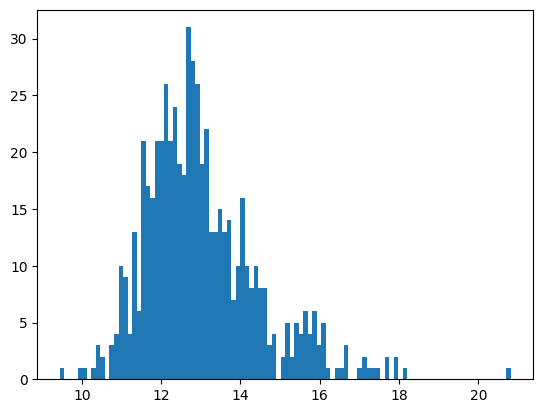

In [43]:
# Mostremos un histograma de los mape obtenidos
plt.hist(lista_mape_mod1, bins= 100)
plt.show()

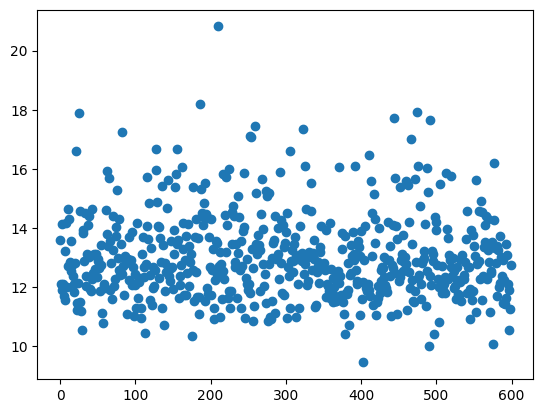

In [47]:
# Mostremos un diagrama de dispersion de los mape obtenidos
plt.scatter(x = range(len(lista_mape_mod1)), y = lista_mape_mod1)

In [53]:
# Analicemos la distribucion de los MAPE recientemente calculados
# import scipy
# help(scipy)
import scipy.stats
# dir(scipy.stats)
# help(scipy.stats.normaltest)
# COncluimos que requerimos un p-value (mayor a 0.05) para que la muestra
# provenga de una distribucion normal
scipy.stats.normaltest(lista_mape_mod1)
# pvalue=1.117586421857789e-25 : Concluimos que los elementos almacenados en
# lista_mape_mod1 no provienen de una normal

NormaltestResult(statistic=114.90691189067994, pvalue=1.117586421857789e-25)

In [70]:
# Calculemos el mape promedio considerando el tamaño del subconjunto de
# testeo como una constante (Habiendo concluido de que la media no es un
# "buen" representante)

np.mean(lista_mape_mod1)

13.01296897206999

In [71]:
# Calculemos un indicador de volatilidad para lista_mape_mod1
np.var(lista_mape_mod1)

2.0934249540591305

In [ ]:
# Consideremos realizar el experimentos de construir una lista de mape
# pero modificando el tamaño del subconjunto de testeo

# Creamos una lista para almacenar esos mape
lista_mape_mod1_exp2 = []

for i in range(600):
  # Generemos un numero aleatorio en el intervalo [0.05, 0.25] para el
  # argumento ts de la funcion analisis_mod1
  lista_mape_mod1_exp2.append(analisis_mod1(ts = np.random.randint(5,25)/100 ))

# Mostremos esta lista
lista_mape_mod1_exp2

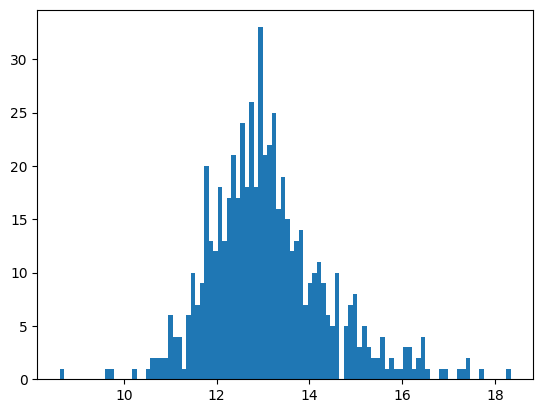

In [68]:
# Mostremos un histograma de la lista lista_mape_mod1_exp2
plt.hist(lista_mape_mod1_exp2, bins = 100)
plt.show()

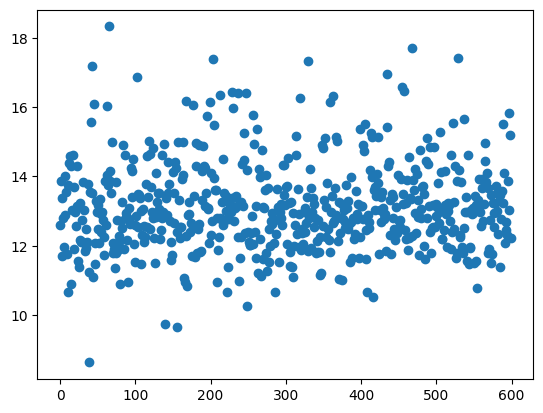

In [69]:
# Mostremos un diagrama de dispersion para el objeto lista_mape_mod1_exp2
plt.scatter(x = range(len(lista_mape_mod1_exp2)), y = lista_mape_mod1_exp2)
plt.show()

In [72]:
# Analicemos la normalidad del lista_mape_mod1_exp2
scipy.stats.normaltest(lista_mape_mod1_exp2)
# pvalue=1.7512746568476487e-14 : Concluimos de que esta muestra tampoco proviene
# de una distribucion normal

NormaltestResult(statistic=63.35169480755257, pvalue=1.7512746568476487e-14)

In [73]:
# Calculemos la media de lista_mape_mod1_exp2
np.mean(lista_mape_mod1_exp2)

13.116874622001404

In [74]:
# Calculemos la varianza de lista_mape_mod1_exp2
np.var(lista_mape_mod1_exp2)

1.6419024446210677

In [85]:
# tarea0 : seria modificar la funcion analisis_mod1 para que devuelva
  # mape
  # los parametros de la regresion lineal
  # los subconjuntos de entrenamiento y testo
# dir(MOdelHousePrice1)
print(MOdelHousePrice1.coef_)
print(MOdelHousePrice1.intercept_)

[-1.85871612e+02 -7.54886614e+01  4.27552023e-01  1.77126014e+04
  4.71884518e+03  2.62608307e+02  1.46895374e+02  3.42430843e+01
  9.10827377e+00 -3.57439055e+00  9.87955862e-01  6.52183909e+00
  1.63297575e+01  1.55909804e+01 -2.82918430e-01  3.16378194e+01
  1.11397931e+04  2.80239908e+03  4.48721019e+03 -6.27388767e+02
 -9.50099578e+03 -1.06498860e+04  4.76924121e+03  4.37381444e+03
  1.06168792e+02  1.07110786e+04 -9.42663733e-01  2.09933919e+01
 -6.69948536e+00  6.11933766e+00  2.70605587e+01  5.44468956e+01
 -2.46678338e+01 -2.18668320e+00 -1.16874475e+02 -5.20248526e+02]
-31500.668728664983


In [ ]:
# tarea1 : Analizar (para cada escenacio : lista_mape_mod1 y lista_mape_mod1_exp2)
# todos los modelos que se encuentran en [mean-var, mean+var]

In [76]:
# tarea2 : MOdificar la instancia a modelar sin considerar el termino
# independiente de la regresion lineal
# help(LinearRegression)

## Mejorar el poder predictivo de mi modelo de regresion lineal

### **Estrategia 1** : COnsideremos construir un modelo usando las variables de naturaleza no numerica

In [88]:
df[lista_var_no_num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     588 non-null    object
 18  ExterQual      1460 non-null

In [91]:
# Analicemos que hacer con los valores faltantes de las variables de
# naturaleza no numerica
df_obj_null = df[lista_var_no_num].isnull().sum().sort_values(ascending= False)/df.shape[0]*100
df_obj_null

,0
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
MasVnrType,59.726027
FireplaceQu,47.260274
GarageType,5.547945
GarageCond,5.547945
GarageQual,5.547945
GarageFinish,5.547945


In [97]:
# Politica 1 : Columnas (variables/features) con mas del 45% de valores faltantes
# se eliminan
Columnas_eliminar = df_obj_null[df_obj_null > 45].index

df_obj_temp1 = df[lista_var_no_num].drop(Columnas_eliminar , axis = 1)
df_obj_temp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  ExterQual      1460 non-null   object
 17  ExterCond      1460 non-null   object
 18  Foundation     1460 non-null

In [99]:
# Verifiquemos que df_obj_temp1 aun posee valores faltantes
df_obj_temp1.isnull().sum().sort_values(ascending= False)/df.shape[0]*100

,0
GarageCond,5.547945
GarageQual,5.547945
GarageFinish,5.547945
GarageType,5.547945
BsmtExposure,2.602740
BsmtFinType2,2.602740
BsmtCond,2.534247
BsmtFinType1,2.534247
BsmtQual,2.534247
Electrical,0.068493


In [106]:
# Rellenemos (usando el metodo fillna) los valores faltantes de df_obj_temp1
# usando la moda
for col in df_obj_temp1.columns:
  df_obj_temp1[col] = df_obj_temp1[col].fillna(df_obj_temp1[col].mode()[0])

# Validemos que no existen valores faltantes en df_obj_temp1
df_obj_temp1.isnull().sum().sum()

0

In [107]:
# Crear una nueva variables con las columnas de naturaleza no numerica
# que este sin valores faltantes
df_obj = df_obj_temp1.copy()
df_obj

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [108]:
# Necesito expresar la informacion de naturaleza cualitativa de df_obj como
# informacion cuantitativa
df_obj_num = pd.get_dummies(df_obj)
df_obj_num.shape

(1460, 230)

#### Construccion de nuestro segundo modelo de regresion lineal

In [112]:
# Definamos la variable dependiente y las variables independientes
# para este segundo modelo
y = df.SalePrice
X_model2 = df_obj_num.copy()

In [113]:
#
# Primer paso : Particionado de los datos
# Los datos que corresponden a las variables independientes y a la variable
# dependiente ya deben estar listos para modelar
X_train, X_test, y_train, y_test = train_test_split(X_model2, y, test_size = 0.1)

# Segundo paso : Instanciamos la clase a modelar
MOdelHousePrice2 = LinearRegression()
# y = a1*X1 + a2*X2 + a3*X3 + ... + a230*X230 + b
# Observar que el modelo vive en un espacion de 231 dimensiones (R^(231))

# Tercer Paso : Ajustar el modelo utilizando los datos de entrenamiento
# (Calculo de los parametros del modelo)
MOdelHousePrice2.fit(X_train,y_train)

# Cuarto paso :
  # etapa1 : Usar el modelo recientemente ajustado junto con los datos de testeo
  # para construir pronosticos de la variable dependiente
  # MOdelHousePrice2(X_test) = y_forecast2
  # etapa2 : Comparar y_test con lo que mi primer modelo pronostica (y_forecast2)
y_forecast2 = MOdelHousePrice2.predict(X_test)
mape2 = metrics.mean_absolute_percentage_error(y_test, y_forecast2)

# Mostremos el indicador de calidad : mape1
print(mape1*100)
# 12.282424416865732
# 13.455915083346312
# 14.589542714638565
# 12.32696057164916

12.32696057164916


In [ ]:
# Empaquetemos esta celda en una funcion que me permita ejecutar
# muchos escenarios

In [ ]:
# Ejecutamos muchos experimientos utilizando la funcion de la celda anterior

In [ ]:
# Analisis de los resultados de estos experimentos :
  # Mostrar un histograma
  # Mostrar un diagrama de dispersion de estos mape obtenidos en los experimentos

In [ ]:
# Analizar normalidad de estos resultados

In [ ]:
# Calcular la media y la varianza de estos resultados


In [ ]:
# Repetir las tareas 0, 1 y 2 realizar en el bloque anterior

### **Estrategia 2** : COnsideremos construir un modelo usando todas las variables

In [123]:
# Debemos juntar X (36 columnas) con X_model2 (230 columnas) y asi obtener un nuevo conjunto de variables
# independientes
X_model3 = pd.concat([X, X_model2], axis = 1)

0